## Data preparation: combining electricity and weather data


In [1]:
import pandas as pd
import numpy as np
import time
import os
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
from datetime import datetime

### Regional electricity data (RTE)


In [ ]:
# Define RTE folder paths for each region
folder_path = {"Auvergne":"/home/onyxia/work/Python_Project_2A/data/RTE/Auvergne",
                "Bourgone":"/home/onyxia/work/Python_Project_2A/data/RTE/Bourgogne",
                "Bretagne":"/home/onyxia/work/Python_Project_2A/data/RTE/Bretagne",
                "Centre_Val":"/home/onyxia/work/Python_Project_2A/data/RTE/Centre_Val",
                "Grand_est":"/home/onyxia/work/Python_Project_2A/data/RTE/Grand_est",
                "Hauts-de-france":"/home/onyxia/work/Python_Project_2A/data/RTE/Hauts_de_france",
                "Île-de-France":"/home/onyxia/work/Python_Project_2A/data/RTE/Ile-de-france",
                "Normandie":"/home/onyxia/work/Python_Project_2A/data/RTE/Normandie",
                "Nouvelle-Aquitaine":"/home/onyxia/work/Python_Project_2A/data/RTE/Nouvelle_aquitaine",
                "Occitanie":"/home/onyxia/work/Python_Project_2A/data/RTE/Occitaine",
                "Pays-de-la-loire":"/home/onyxia/work/Python_Project_2A/data/RTE/Pays_de_la_loire",
                "Provence-Alpes-Côte d'Azur":"/home/onyxia/work/Python_Project_2A/data/RTE/PACA"}

In [3]:
# Build the list of all RTE Excel files across regions
paths_file = []
for ele in folder_path.items():
    for xls in os.listdir(ele[1]):
        if xls.endswith(".xls"):
            file_xls = os.path.join(ele[1],xls)
            paths_file.append(file_xls)
paths_file

['/home/onyxia/work/Python_Project_2A/data/RTE/Auvergne/eCO2mix_RTE_Auvergne-Rhone-Alpes_Annuel-Definitif_2021.xls',
 '/home/onyxia/work/Python_Project_2A/data/RTE/Auvergne/eCO2mix_RTE_Auvergne-Rhone-Alpes_Annuel-Definitif_2023.xls',
 '/home/onyxia/work/Python_Project_2A/data/RTE/Auvergne/eCO2mix_RTE_Auvergne-Rhone-Alpes_Annuel-Definitif_2024.xls',
 '/home/onyxia/work/Python_Project_2A/data/RTE/Auvergne/eCO2mix_RTE_Auvergne-Rhone-Alpes_Annuel-Definitif_2022.xls',
 '/home/onyxia/work/Python_Project_2A/data/RTE/Auvergne/eCO2mix_RTE_Auvergne-Rhone-Alpes_Annuel-Definitif_2020.xls',
 '/home/onyxia/work/Python_Project_2A/data/RTE/Bourgogne/eCO2mix_RTE_Bourgogne-Franche-Comt‚_Annuel-Definitif_2024.xls',
 '/home/onyxia/work/Python_Project_2A/data/RTE/Bourgogne/eCO2mix_RTE_Bourgogne-Franche-Comt‚_Annuel-Definitif_2021.xls',
 '/home/onyxia/work/Python_Project_2A/data/RTE/Bourgogne/eCO2mix_RTE_Bourgogne-Franche-Comt‚_Annuel-Definitif_2023.xls',
 '/home/onyxia/work/Python_Project_2A/data/RTE/Bourg

In [ ]:
# Merging all RTE csv file
dfs = []
for file in paths_file:
    df = pd.read_csv(file, sep='\t', encoding='latin-1')
    dfs.append(df)
df_ele = pd.concat(dfs, ignore_index=True)

/tmp/ipykernel_15638/1628492426.py:3: DtypeWarning: Columns (12,13,14,15,18,20,25,26,28,30,32,37,38,40,44,47,51,54) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file, sep='\t', encoding='latin-1')
/tmp/ipykernel_15638/1628492426.py:3: DtypeWarning: Columns (12,13,14,15,17,20,21,23,29,32,33,35,47,54) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file, sep='\t', encoding='latin-1')
/tmp/ipykernel_15638/1628492426.py:3: DtypeWarning: Columns (12,13,14,15,24,27,36,39) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file, sep='\t', encoding='latin-1')
/tmp/ipykernel_15638/1628492426.py:3: DtypeWarning: Columns (12,13,14,15,17,18,23,24,25,27,29,30,35,36,37,39) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file, sep='\t', encoding='latin-1')
/tmp/ipykernel_15638/1628492426.py:3: DtypeWarning: Columns (12,13,1

In [5]:
df_ele.shape

(2104764, 389)

In [6]:
df_ele.head(10)

,Périmètre,Nature,Date,Heures,Consommation,Thermique,Nucléaire,Eolien,Solaire,Hydraulique,...,Flux physiques Luxembourg vers PACA,Flux physiques Royaume-Uni vers PACA,Flux physiques Suisse vers PACA,Flux physiques de PACA vers Allemagne,Flux physiques de PACA vers Belgique,Flux physiques de PACA vers Espagne,Flux physiques de PACA vers Italie,Flux physiques de PACA vers Luxembourg,Flux physiques de PACA vers Royaume-Uni,Flux physiques de PACA vers Suisse
0,Auvergne-Rhône-Alpes,Données définitives,2021-01-01,00:00,8586.0,156.0,10710.0,66.0,0.0,3096.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Auvergne-Rhône-Alpes,Données définitives,2021-01-01,00:15,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Auvergne-Rhône-Alpes,Données définitives,2021-01-01,00:30,8373.0,179.0,10622.0,64.0,0.0,2977.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Auvergne-Rhône-Alpes,Données définitives,2021-01-01,00:45,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Auvergne-Rhône-Alpes,Données définitives,2021-01-01,01:00,8134.0,181.0,10652.0,58.0,0.0,2667.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Auvergne-Rhône-Alpes,Données définitives,2021-01-01,01:15,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Auvergne-Rhône-Alpes,Données définitives,2021-01-01,01:30,8130.0,179.0,10662.0,54.0,0.0,2592.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Auvergne-Rhône-Alpes,Données définitives,2021-01-01,01:45,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Auvergne-Rhône-Alpes,Données définitives,2021-01-01,02:00,8102.0,181.0,10600.0,42.0,0.0,2827.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Auvergne-Rhône-Alpes,Données définitives,2021-01-01,02:15,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
feauture = ['Périmètre','Nature','Date','Heures','Consommation']
df_con = df_ele[feauture].copy()


### Checking missing values in RTE data


In [8]:
df_con.isnull().sum()

Périmètre             0
Nature               60
Date                 60
Heures               60
Consommation    1052412
dtype: int64

<Axes: >

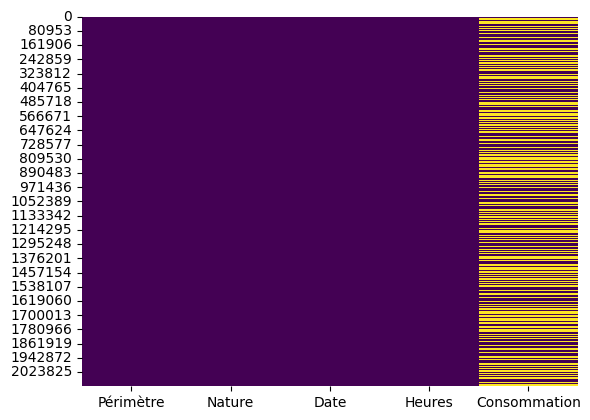

In [9]:
sns.heatmap(df_con.isnull(),cbar=False,cmap='viridis')

### Distribution of electricity consumption before dropping missing values


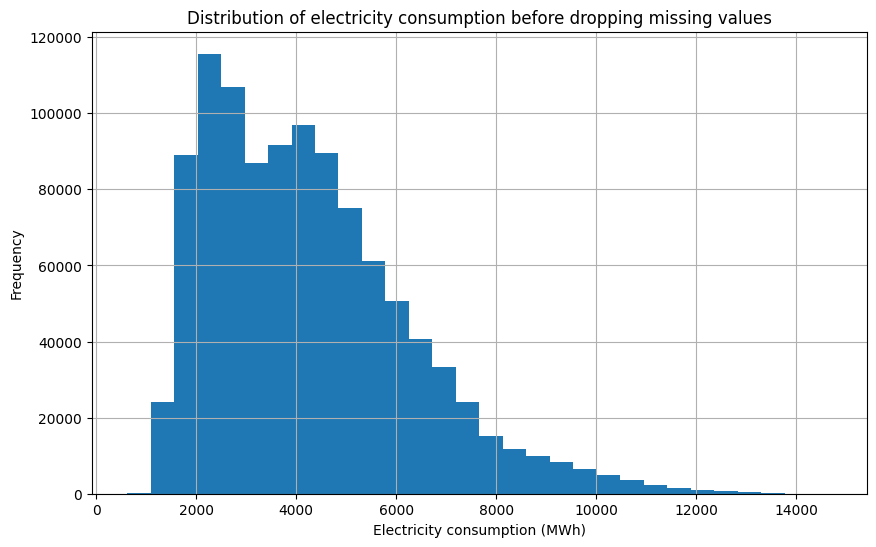

In [10]:
plt.figure(figsize=(10, 6))
df_con["Consommation"].hist(bins=30)
plt.title("Distribution of electricity consumption before dropping missing values")
plt.xlabel("Electricity consumption (MWh)")
plt.ylabel("Frequency")
plt.show()

## Drop missing value

In [11]:
df_con = df_con.dropna()
df_ele = df_con.copy()

### Distribution of electricity consumption after dropping missing values


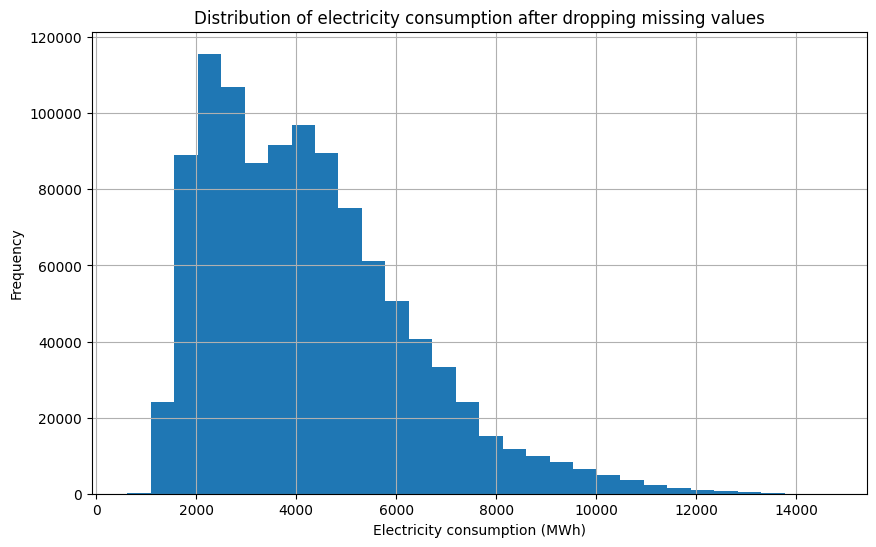

In [12]:
plt.figure(figsize=(10, 6))
df_con["Consommation"].hist(bins=30)
plt.title("Distribution of electricity consumption after dropping missing values")
plt.xlabel("Electricity consumption (MWh)")
plt.ylabel("Frequency")
plt.show()

### Checking missing values in the cleaned dataset


<Axes: >

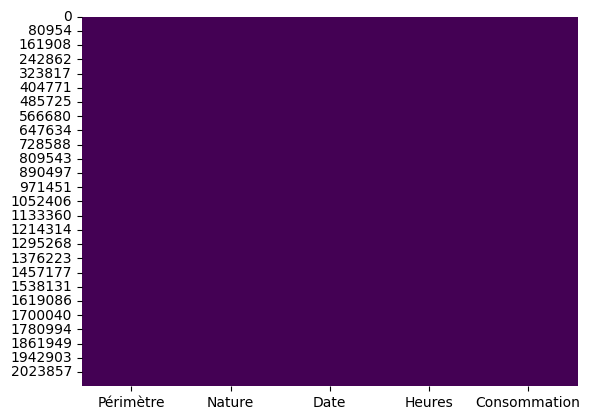

In [13]:
sns.heatmap(df_con.isnull(),cbar=False,cmap='viridis')

## Comment:
`Consommation` is systematically missing at fixed times (:15, :45), so these rows are structurally empty which is not real observations. <br>
After dropping them, the histogram keeps the same right-skewed shape, meaning the overall distribution of electricity consumption is **unchanged**. we only removed rows with no valid value.

-----------
-----------

In [14]:
df_ele['Datetime'] = pd.to_datetime(
    df_ele['Date'].astype(str) + ' ' + df_ele['Heures'].astype(str),
    errors='coerce'
)

In [15]:
df_ele.head()

,Périmètre,Nature,Date,Heures,Consommation,Datetime
0,Auvergne-Rhône-Alpes,Données définitives,2021-01-01,00:00,8586.0,2021-01-01 00:00:00
2,Auvergne-Rhône-Alpes,Données définitives,2021-01-01,00:30,8373.0,2021-01-01 00:30:00
4,Auvergne-Rhône-Alpes,Données définitives,2021-01-01,01:00,8134.0,2021-01-01 01:00:00
6,Auvergne-Rhône-Alpes,Données définitives,2021-01-01,01:30,8130.0,2021-01-01 01:30:00
8,Auvergne-Rhône-Alpes,Données définitives,2021-01-01,02:00,8102.0,2021-01-01 02:00:00


In [16]:
df_ele.shape

(1052352, 6)

In [17]:
# Aggregate half hourly RTE data to daily consumption per region
df_ele = df_ele.set_index('Datetime')
df_ele_daily = (
       df_ele.groupby("Périmètre", group_keys=False).resample('D')
           .agg({'Consommation': 'sum',
                  'Périmètre': 'first',
                 'Nature': 'first'})
           .reset_index()
)

In [18]:
df_ele_daily

,Datetime,Consommation,Périmètre,Nature
0,2020-01-01,403787.0,Auvergne-Rhône-Alpes,Données définitives
1,2020-01-02,443531.0,Auvergne-Rhône-Alpes,Données définitives
2,2020-01-03,434626.0,Auvergne-Rhône-Alpes,Données définitives
3,2020-01-04,395169.0,Auvergne-Rhône-Alpes,Données définitives
4,2020-01-05,400169.0,Auvergne-Rhône-Alpes,Données définitives
...,...,...,...,...
21919,2024-12-27,181429.0,Pays-de-la-Loire,Données consolidées
21920,2024-12-28,171307.0,Pays-de-la-Loire,Données consolidées
21921,2024-12-29,169980.0,Pays-de-la-Loire,Données consolidées
21922,2024-12-30,185431.0,Pays-de-la-Loire,Données consolidées


In [19]:
df_ele_daily['Périmètre'].count

<bound method Series.count of 0        Auvergne-Rhône-Alpes
1        Auvergne-Rhône-Alpes
2        Auvergne-Rhône-Alpes
3        Auvergne-Rhône-Alpes
4        Auvergne-Rhône-Alpes
                 ...         
21919        Pays-de-la-Loire
21920        Pays-de-la-Loire
21921        Pays-de-la-Loire
21922        Pays-de-la-Loire
21923        Pays-de-la-Loire
Name: Périmètre, Length: 21924, dtype: object>

In [20]:
df_ele_daily.columns

Index(['Datetime', 'Consommation', 'Périmètre', 'Nature'], dtype='object')

## Weather data (NASA POWER)


In [21]:
# Import functions to download NASA POWER weather data
import sys
sys.path.append("..") 
from scripts.get_data import fetch_power, fetch_region_weather_mean

In [22]:
# Define time range and list of weather variables to download from NASA POWER
START, END = 2020, 2024            
TEMPORAL = "daily"                  
PARAMS = [
    # precipitation & humidity
    "PRECTOTCORR","RH2M","QV2M",
    # temperature (2m)
    "T2M","T2M_MAX","T2M_MIN","T2M_RANGE",
    # wind (2m,10m), direction (10m)
    "WS2M","WS10M","WD10M",
    # radiation (shortwave, all-sky, clear-sky)
    "ALLSKY_SFC_SW_DWN","CLRSKY_SFC_SW_DWN",
    # pressure
    "PS",
    # soil moisture 
    "GWETTOP","GWETROOT"
]

In [23]:
# region France (INSEE, name, lat, lon)
Regions = [
    ("83", "Auvergne-Rhône-Alpes", 45.2968119, 4.6604809),
    ("27", "Bourgogne-Franche-Comté", 47.118711, 4.9691044),
    ("53", "Bretagne", 48.2640845, -2.9202408),
    ("24", "Centre-Val de Loire", 47.5490251, 1.7324062),
    ("44", "Grand-Est", 48.4845157, 6.113035),
    ("32", "Hauts-de-France", 50.1024606, 2.7247515),
    ("11", "Ile-de-France", 48.6443057, 2.7537863),
    ("28", "Normandie", 49.0677708, 0.3138532),
    ("75", "Nouvelle-Aquitaine", 45.4039367, 0.3756199),
    ("76", "Occitanie", 43.6487851, 2.3435684),
    ("52", "Pays-de-la-Loire", 47.6594864, -0.8186143),
    ("93", "PACA", 44.0580563, 6.0638506),
]


In [24]:
REGION_POINTS = {
    "Auvergne-Rhône-Alpes": [
        ("center", 45.7500, 4.8500),   # Lyon 
        ("north",  46.2050, 5.2280),   # Bourg-en-Bresse 
        ("south",  44.9330, 4.8920),   # Valence 
        ("east",   45.8990, 6.1290),   # Annecy 
        ("west",   45.7830, 3.0830),   # Clermont-Ferrand 
    ],

    "Bourgogne-Franche-Comté": [
        ("center", 47.3220, 5.0410),   # Dijon 
        ("north",  47.7990, 3.5730),   # Auxerre 
        ("south",  46.3060, 4.8280),   # Mâcon 
        ("east",   47.2380, 6.0240),   # Besançon 
        ("west",   46.9890, 3.1590),   # Nevers 
    ],
    "Bretagne": [
        ("center", 48.1170, -1.6780),  # Rennes
        ("north",  48.5150, -2.7650),  # Saint-Brieuc
        ("south",  47.6580, -2.7600),  # Vannes 
        ("east",   48.3530, -1.1990),  # Fougères 
        ("west",   48.3900, -4.4860),  # Brest 
    ],

    "Centre-Val de Loire": [
        ("center", 47.9020, 1.9090),   # Orléans 
        ("north",  48.4470, 1.4890),   # Chartres 
        ("south",  46.8100, 1.6930),   # Châteauroux
        ("east",   47.5930, 1.3290),   # Blois 
        ("west",   47.3940, 0.6848),   # Tours 
    ],

    "Grand-Est": [
        ("center", 48.6930, 6.1830),   # Nancy 
        ("north",  49.7680, 4.7240),   # Charleville-Mézières 
        ("south",  47.7500, 7.3350),   # Mulhouse 
        ("east",   48.5730, 7.7520),   # Strasbourg 
        ("west",   49.2580, 4.0310),   # Reims 
    ],

    "Hauts-de-France": [
        ("center", 49.8940, 2.3000),   # Amiens 
        ("north",  51.0380, 2.3770),   # Dunkerque 
        ("south",  49.4300, 2.0830),   # Beauvais 
        ("east",   50.3570, 3.5240),   # Valenciennes 
        ("west",   50.7260, 1.6150),   # Boulogne-sur-Mer 
    ],

    "Ile-de-France": [
        ("center", 48.8566, 2.3522),   # Paris 
        ("north",  49.0360, 2.0630),   # Cergy 
        ("south",  48.6290, 2.4410),   # Évry-Courcouronnes 
        ("east",   48.9600, 2.8880),   # Meaux
        ("west",   48.8049, 2.1204),   # Versailles 
    ],

    "Normandie": [
        ("center", 49.1830, -0.3690),  # Caen 
        ("north",  49.9220, 1.0770),   # Dieppe 
        ("south",  48.4310, 0.0930),   # Alençon
        ("east",   49.0270, 1.1510),   # Évreux 
        ("west",   49.6390, -1.6210),  # Cherbourg-en-Cotentin 
    ],

    "Nouvelle-Aquitaine": [
        ("center", 45.6480, 0.1560),   # Angoulême 
        ("north",  46.5800, 0.3400),   # Poitiers 
        ("south",  43.2950, -0.3708),  # Pau 
        ("east",   45.8336, 1.2611),   # Limoges 
        ("west",   44.8378, -0.5792),  # Bordeaux 
    ],

    "Occitanie": [
        ("center", 43.6045, 1.4440),   # Toulouse 
        ("north",  44.3500, 2.5800),   # Rodez 
        ("south",  42.6880, 2.8940),   # Perpignan 
        ("east",   43.6108, 3.8767),   # Montpellier 
        ("west",   43.2330, 0.0830),   # Tarbes 
    ],

    "Pays-de-la-Loire": [
        ("center", 47.4780, -0.5630),  # Angers
        ("north",  48.0730, -0.7730),  # Laval 
        ("south",  46.6700, -1.4260),  # La Roche-sur-Yon 
        ("east",   48.0077, 0.1984),   # Le Mans
        ("west",   47.2184, -1.5536),  # Nantes 
    ],

    "PACA": [
        ("center", 43.5297, 5.4470),   # Aix-en-Provence 
        ("north",  44.5590, 6.0799),   # Gap 
        ("south",  43.1242, 5.9280),   # Toulon 
        ("east",   43.7102, 7.2620),   # Nice
        ("west",   43.9493, 4.8055),   # Avignon
    ],
}

In [25]:
all_regions_weather = []
for insee, name, lat, lon in Regions:
    print("Fetching region:", name)
    df_reg = fetch_region_weather_mean(name, START, END, temporal=TEMPORAL,REGION_POINTS=REGION_POINTS,PARAMS=PARAMS)
    all_regions_weather.append(df_reg)
df_weather_regions = pd.concat(all_regions_weather, ignore_index=True)
df_weather_regions.rename(columns={"date": "Datetime"}, inplace=True)

Fetching region: Auvergne-Rhône-Alpes
Fetching region: Bourgogne-Franche-Comté
Fetching region: Bretagne
Fetching region: Centre-Val de Loire
Fetching region: Grand-Est
Fetching region: Hauts-de-France
Fetching region: Ile-de-France
Fetching region: Normandie
Fetching region: Nouvelle-Aquitaine
Fetching region: Occitanie
Fetching region: Pays-de-la-Loire
Fetching region: PACA


In [26]:
df_weather_regions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21924 entries, 0 to 21923
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Datetime           21924 non-null  datetime64[ns]
 1   year               21924 non-null  int64         
 2   month              21924 non-null  int64         
 3   day                21924 non-null  int64         
 4   Regions            21924 non-null  object        
 5   ALLSKY_SFC_SW_DWN  21924 non-null  float64       
 6   CLRSKY_SFC_SW_DWN  21924 non-null  float64       
 7   GWETROOT           21924 non-null  float64       
 8   GWETTOP            21924 non-null  float64       
 9   PRECTOTCORR        21924 non-null  float64       
 10  PS                 21924 non-null  float64       
 11  QV2M               21924 non-null  float64       
 12  RH2M               21924 non-null  float64       
 13  T2M                21924 non-null  float64       
 14  T2M_MA

## Map of weather sampling points (5 subpoints per region)


In [27]:
# load regions polygons
regions_url = "https://france-geojson.gregoiredavid.fr/repo/regions.geojson"
gdf_regions = gpd.read_file(regions_url)
gdf_regions.head()

,code,nom,geometry
0,11,Île-de-France,"POLYGON ((1.92215 48.4576, 1.92074 48.44775, 1..."
1,24,Centre-Val de Loire,"POLYGON ((0.81482 48.67016, 0.82767 48.68072, ..."
2,27,Bourgogne-Franche-Comté,"POLYGON ((6.94054 47.43337, 6.94168 47.4158, 6..."
3,28,Normandie,"POLYGON ((-1.11962 49.35557, -1.11503 49.3624,..."
4,32,Hauts-de-France,"POLYGON ((4.14089 49.97876, 4.15398 49.97484, ..."


In [28]:
# Flatten to a DataFrame
rows = []
for reg, pts in REGION_POINTS.items():
    for label, lat, lon in pts:
        rows.append({"region_key": reg, "label": label, "lat": lat, "lon": lon})

df_pts = pd.DataFrame(rows)

# Turn into GeoDataFrame
gdf_points = gpd.GeoDataFrame(
    df_pts,
    geometry=gpd.points_from_xy(df_pts["lon"], df_pts["lat"]),
    crs="EPSG:4326",
)

In [29]:
# Show name on the plot 
name_map = {
    "Auvergne-Rhône-Alpes": "Auvergne-Rhône-Alpes",
    "Bourgogne-Franche-Comté": "Bourgogne-Franche-Comté",
    "Bretagne": "Bretagne",
    "Centre-Val de Loire": "Centre-Val de Loire",
    "Grand-Est": "Grand Est",
    "Hauts-de-France": "Hauts-de-France",
    "Ile-de-France": "Île-de-France",
    "Normandie": "Normandie",
    "Nouvelle-Aquitaine": "Nouvelle-Aquitaine",
    "Occitanie": "Occitanie",
    "Pays-de-la-Loire": "Pays de la Loire",
    "PACA": "Provence-Alpes-Côte d'Azur",
}
gdf_regions = gdf_regions[gdf_regions["nom"].isin(name_map.values())].copy()
reverse_map = {v: k for k, v in name_map.items()}
gdf_regions["region_key"] = gdf_regions["nom"].map(reverse_map)


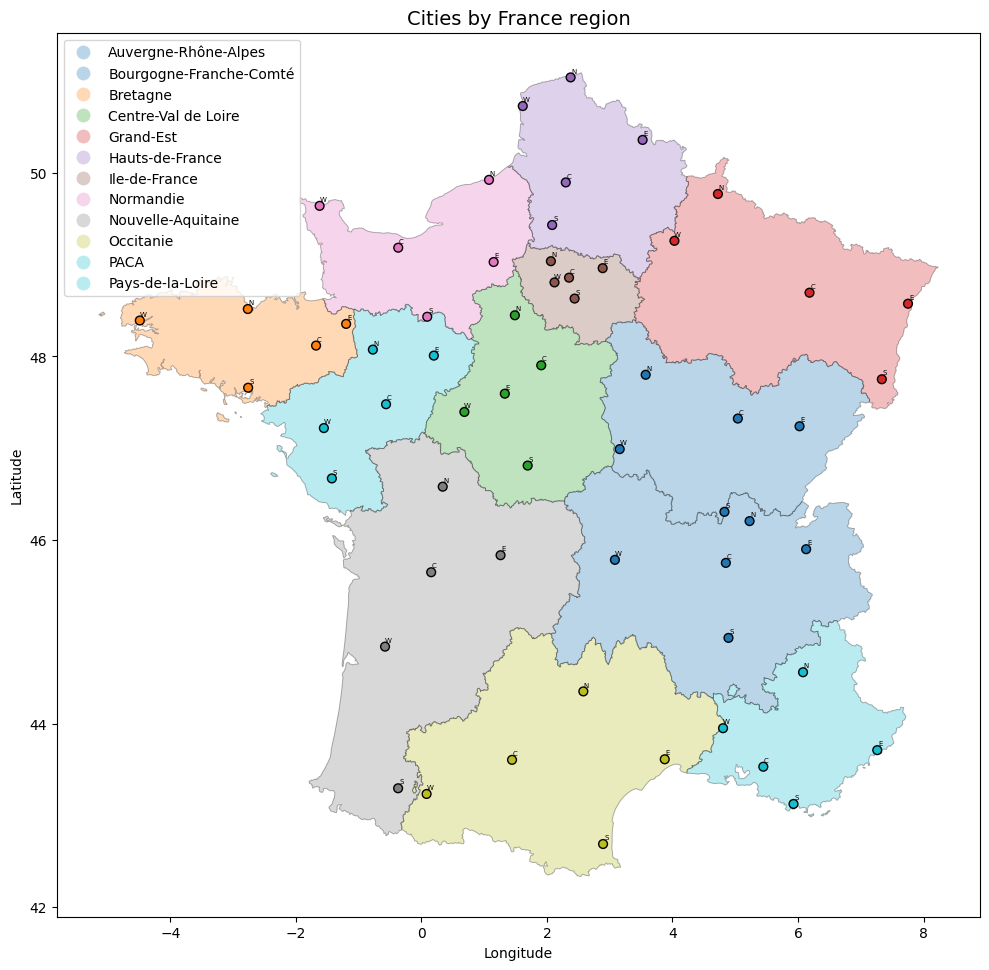

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))

# Plot regions with a different color per region
gdf_regions.plot(
    column="region_key",
    categorical=True,
    legend=True,
    edgecolor="black",
    linewidth=0.7,
    alpha=0.3,
    ax=ax,
)

# Plot points and colors 
gdf_points.plot(
    ax=ax,
    column="region_key",
    categorical=True,
    markersize=40,
    edgecolor="black",
    legend=False,
)
# add label
for _, row in gdf_points.iterrows():
    ax.text(
        row.geometry.x + 0.05,
        row.geometry.y + 0.05,
        row["label"][0].upper(),  
        fontsize=5,
        ha="center",
    )
ax.set_title("Weather Data Locations by French Region", fontsize=14)
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
plt.tight_layout()
plt.show()


---------

## Merge daily electricity data with regional weather data


In [31]:
df_weather = df_weather_regions.copy()
df_weather.head(2)

var,Datetime,year,month,day,Regions,ALLSKY_SFC_SW_DWN,CLRSKY_SFC_SW_DWN,GWETROOT,GWETTOP,PRECTOTCORR,PS,QV2M,RH2M,T2M,T2M_MAX,T2M_MIN,T2M_RANGE,WD10M,WS10M,WS2M
0,2020-01-01,2020,1,1,Auvergne-Rhône-Alpes,5.494,6.860,0.768,0.778,0.062,97.706,3.690,87.752,0.940,4.552,-0.758,5.310,291.10,1.938,1.168
1,2020-01-02,2020,1,2,Auvergne-Rhône-Alpes,4.532,6.448,0.768,0.778,0.042,97.484,4.194,87.350,2.642,7.794,-0.600,8.394,175.38,3.454,2.140


In [32]:
# Rename columns
df_weather.rename(columns={"date":"Datetime","department":"Regions"}, inplace=True)
df_ele_daily.rename(columns={"Périmètre":"Regions"},inplace= True)


### Joining electricity and weather data by region and datetime


In [33]:
df_weather['Datetime'] = pd.to_datetime(df_weather['Datetime'])
df_ele_daily['Datetime'] = pd.to_datetime(df_ele_daily['Datetime'])
# Merge on Datetime and Regions
df_final = pd.merge(
    df_ele_daily,
    df_weather,
    on=['Datetime', 'Regions'],
    how='inner'
)


In [34]:
df_final.head()

,Datetime,Consommation,Regions,Nature,year,month,day,ALLSKY_SFC_SW_DWN,CLRSKY_SFC_SW_DWN,GWETROOT,...,PS,QV2M,RH2M,T2M,T2M_MAX,T2M_MIN,T2M_RANGE,WD10M,WS10M,WS2M
0,2020-01-01,403787.0,Auvergne-Rhône-Alpes,Données définitives,2020,1,1,5.494,6.860,0.768,...,97.706,3.690,87.752,0.940,4.552,-0.758,5.310,291.10,1.938,1.168
1,2020-01-02,443531.0,Auvergne-Rhône-Alpes,Données définitives,2020,1,2,4.532,6.448,0.768,...,97.484,4.194,87.350,2.642,7.794,-0.600,8.394,175.38,3.454,2.140
2,2020-01-03,434626.0,Auvergne-Rhône-Alpes,Données définitives,2020,1,3,3.846,6.454,0.766,...,97.456,4.872,89.086,4.570,8.598,1.944,6.654,196.00,2.976,1.748
3,2020-01-04,395169.0,Auvergne-Rhône-Alpes,Données définitives,2020,1,4,4.684,7.002,0.766,...,97.844,4.846,94.106,3.732,7.036,-0.244,7.280,276.04,3.874,2.512
4,2020-01-05,400169.0,Auvergne-Rhône-Alpes,Données définitives,2020,1,5,6.516,7.210,0.766,...,97.850,3.932,91.162,1.246,5.364,-1.542,6.906,236.76,3.654,2.338


In [35]:
df_final.to_csv("temp_electricity.csv",index = False)